**import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#load the data
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**select the feaatures of clustering**

In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [4]:
#standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


***model training***

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


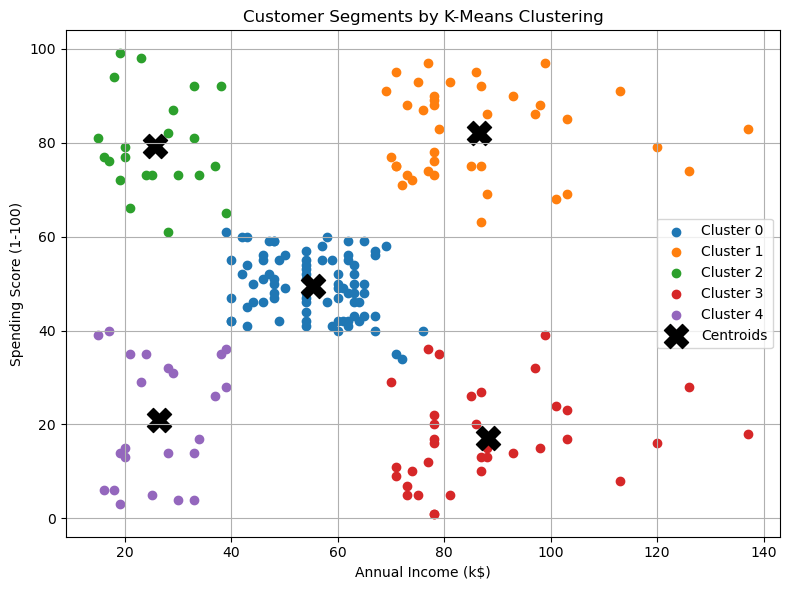

In [6]:
plt.figure(figsize=(8, 6))
for cluster in range(5):
    plt.scatter(
        df[df['Cluster'] == cluster]['Annual Income (k$)'],
        df[df['Cluster'] == cluster]['Spending Score (1-100)'],
        label=f'Cluster {cluster}'
    )

# Plot cluster centers
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
    s=300, c='black', marker='X', label='Centroids'
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments by K-Means Clustering')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


*understand cluster characterstics*

In [7]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary['Customer Count'] = df['Cluster'].value_counts().sort_index()
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)  Customer Count
Cluster                                                                       
0        42.716049           55.296296               49.518519              81
1        32.692308           86.538462               82.128205              39
2        25.272727           25.727273               79.363636              22
3        41.114286           88.200000               17.114286              35
4        45.217391           26.304348               20.913043              23


In [10]:
import joblib

# Save the scaler and KMeans model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']